# Predictive ML Project
- 🖤  Author : [Hailey Hanson](https://github.com/haileylhanson/)
- 🖤  Repository : [datafun-07-ml](https://github.com/haileylhanson/datafun-07-ml)
- 🖤  Date : October 2025 
- 🖤  Purpose : Intro to Data Science: Time Series and Simple Linear Regression to predict New York City's average January high temperatures. 

### Imports

In [662]:
import sys
print(sys.executable)

/Users/haileyhanson/Repos/.venv/bin/python


In [663]:
import sys
!{sys.executable} -m pip install scipy
!{sys.executable} -m pip install scikit-learn


In [664]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.axes import Axes
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


## Part 1 - Chart a Straight Line

In [665]:
# use Pandas DataFrames to plot Celsius vs Fahrenheit 

c = lambda f: 5/9 * (f-32)
temps = [(f, c(f)) for f in range (0, 101, 10)]


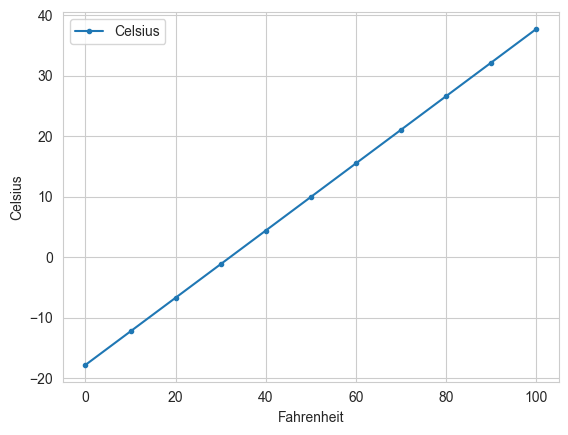

In [666]:

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')



## Part 2 - Prediction

### Section 1 - Data Acquisition

In [667]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')


### Section 2 - Data Inspection

In [668]:

nyc.head(3)
nyc.tail

<bound method NDFrame.tail of        Date  Value  Anomaly
0    189501   34.2     -3.2
1    189601   34.7     -2.7
2    189701   35.5     -1.9
3    189801   39.6      2.2
4    189901   36.4     -1.0
..      ...    ...      ...
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3

[124 rows x 3 columns]>

### Section 3 - Data Cleaning

In [669]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date.dtype

dtype('int64')

### Section 4 - Descriptive Statistics

In [670]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [671]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)


In [672]:
print("Slope : ")
linear_regression.slope



Slope : 


np.float64(0.00014771361132966162)

In [673]:
print("Intercept : ")
linear_regression.intercept

Intercept : 


np.float64(8.694845520062962)

### Section 6 - Predict

### y = mx + b

In [674]:
print("Average high temp in Jan 2024 : ")
linear_regression.slope * 2024 + linear_regression.intercept

Average high temp in Jan 2024 : 


np.float64(8.993817869394197)

In [675]:
print("2019 : ")
linear_regression.slope * 2019 + linear_regression.intercept

2019 : 


np.float64(8.993079301337549)

In [676]:
print("1890 : ")
linear_regression.slope * 1890 + linear_regression.intercept

1890 : 


np.float64(8.974024245476024)

### Section 7 - Visualizations

(10.0, 70.0)

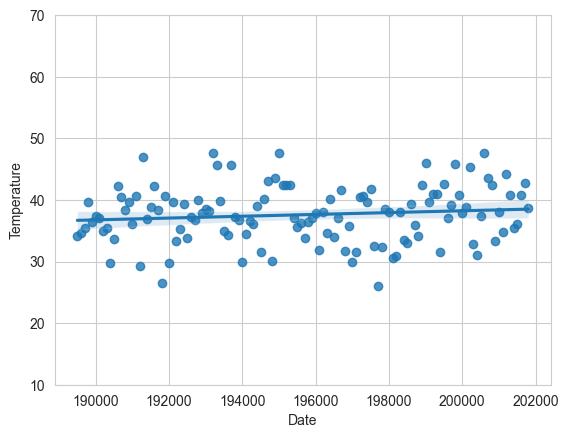

In [677]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Data Acquisition

In [678]:
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [679]:
df.head(3)
df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [680]:
df.Date = df.Date.floordiv(100)
df.columns = ['Date', 'Temperature', 'Anomaly']
pd.set_option('display.precision', 2)


### Section 4 - Descriptive Statistics

In [681]:

df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [682]:
### Section 5 - Build a Model

In [683]:
X_train, X_test, y_train, y_test = train_test_split(df.Date.values.reshape(-1,1), df.Temperature.values, random_state=11)
X_train.shape
X_test.shape

(31, 1)

In [684]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)#, normalize=False)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [685]:
linear_regression.coef_

array([0.01939167])

In [686]:
linear_regression.intercept_

np.float64(-0.30779820252658396)

### Section 6 - Test the Model

In [687]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f"predicted: {p:.2f}, expected: {e:.2f}")

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### y = mx + b

### Section 7 - Predict

In [688]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

In [689]:
print("Average high temp in Jan for 2024 : ")
predict(2024)

Average high temp in Jan for 2024 : 


array([38.94094855])

In [690]:
print("2019 : ")
predict(2019)

2019 : 


array([38.84399018])

In [691]:
print("1890 : ")
predict(1890)

1890 : 


array([36.34246432])

### Section 8 - Visualizations

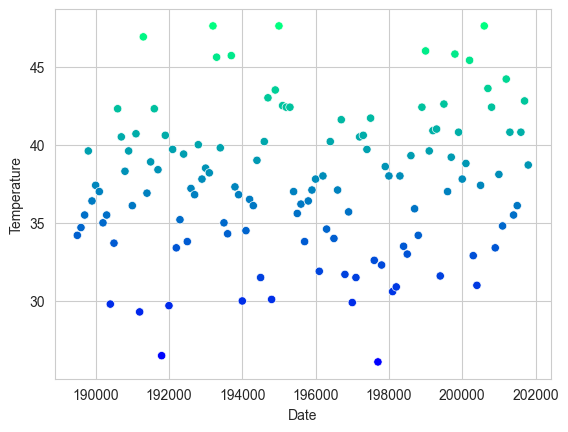

In [692]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)

In [693]:
axes.set_ylim(10,70)

(10.0, 70.0)

In [694]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [695]:
y = predict(x)

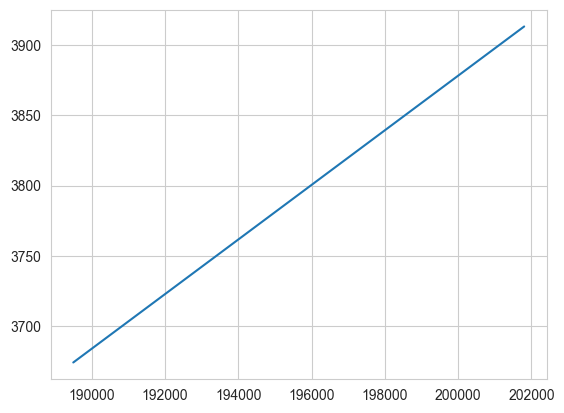

In [696]:
line = plt.plot(x,y)

## Part 4 - Insights